In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
data_train = df_train.copy()
data_test = df_test.copy()

In [3]:
data_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


<AxesSubplot:xlabel='Activity', ylabel='count'>

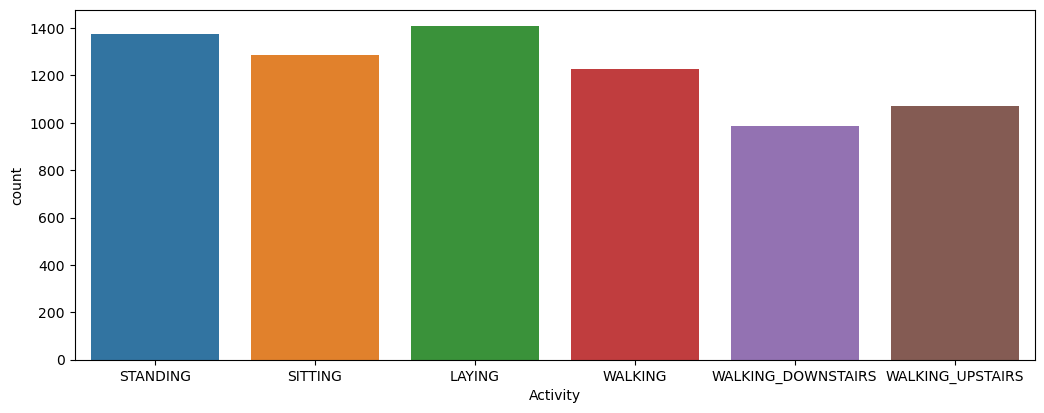

In [4]:
plt.figure(dpi = 100)
plt.subplots_adjust(left=0.9,right=2.5, top = 1)

sns.countplot(x="Activity", data = data_train)

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [6]:
data_train.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

<AxesSubplot:>

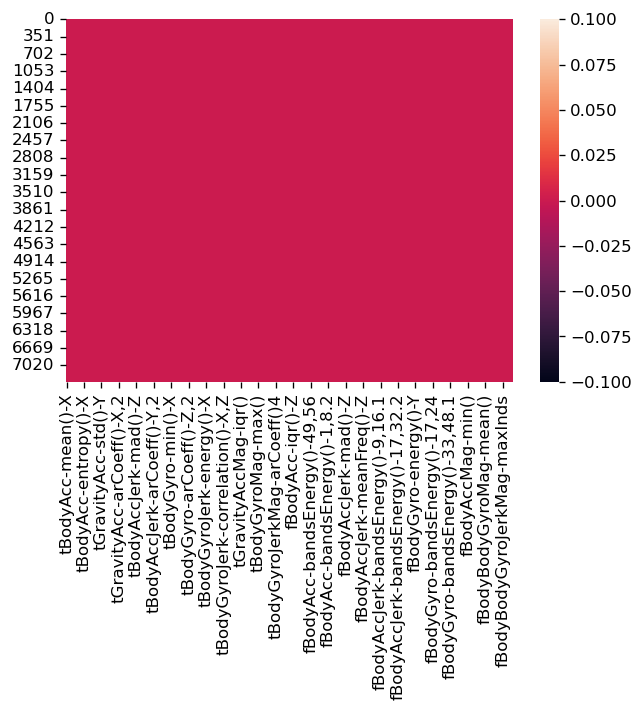

In [7]:
plt.figure(dpi = 120)
sns.heatmap(data_train.isna())

In [8]:
activity_le = LabelEncoder()

In [9]:
data_train['Activity'] = activity_le.fit_transform(data_train['Activity'])

In [10]:
data_test['Activity'] = activity_le.fit_transform(data_test['Activity'])

In [11]:
activity_le.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [12]:
x_train = data_train.drop("Activity", axis = 1).values

In [13]:
y_train = data_train["Activity"].values

In [14]:
x_test = data_test.drop("Activity", axis = 1).values
y_test = data_test["Activity"].values

In [15]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

In [16]:
x_test = sc.transform(x_test)

In [17]:
classifier = []
for i in np.arange(0.1, 1.1 , 0.1):
    for y in ["l1", 'l2']:
        classifier= LogisticRegression(random_state = 5, max_iter=1000, C=i, penalty = y, solver = 'liblinear')
        classifier.fit(x_train, y_train)
        print("Training Score = " + str(classifier.score(x_train, y_train)))
        print("Test Score = " + str(classifier.score(x_test, y_test)))
        print("C = " + str(i) + ", penalty = " + str(y))
        print("=========================")

Training Score = 0.9865342763873776
Test Score = 0.9504580929759077
C = 0.1, penalty = l1
Training Score = 0.9888465723612623
Test Score = 0.9592806243637597
C = 0.1, penalty = l2
Training Score = 0.9904787812840044
Test Score = 0.9569053274516457
C = 0.2, penalty = l1
Training Score = 0.9907508161044614
Test Score = 0.9602986087546658
C = 0.2, penalty = l2
Training Score = 0.9922470076169749
Test Score = 0.9589412962334578
C = 0.30000000000000004, penalty = l1
Training Score = 0.9915669205658324
Test Score = 0.9606379368849678
C = 0.30000000000000004, penalty = l2
Training Score = 0.9931991294885746
Test Score = 0.9592806243637597
C = 0.4, penalty = l1
Training Score = 0.9921109902067464
Test Score = 0.9606379368849678
C = 0.4, penalty = l2
Training Score = 0.9937431991294886
Test Score = 0.9582626399728538
C = 0.5, penalty = l1
Training Score = 0.9926550598476604
Test Score = 0.9599592806243638
C = 0.5, penalty = l2
Training Score = 0.9944232861806311
Test Score = 0.9579233118425518


In [18]:
print("Training Score = " + str(classifier.score(x_train, y_train)))

Training Score = 0.9944232861806311


In [19]:
print("Test Score = " + str(classifier.score(x_test, y_test)))

Test Score = 0.9613165931455717
